# Mobile Price Classification

Fem imports:

In [48]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Veiem com es el dataset:

In [49]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Mirem si tenim NaNs al 'dataset':

In [50]:
nan_count = df.isnull().sum()
nan_percentage = df.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Porcentaje de NaNs por columna:
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


Mirem quin tipus de dades estem tractant i a més observem en una gràfica el balanceig del nombre de dades:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

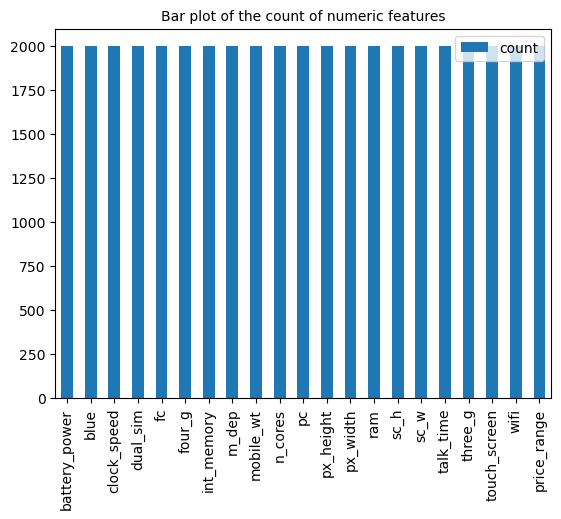

In [51]:
t=df.info()
d = df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=10)

Discretitzem les següents classes:

In [52]:
import numpy as np

# Defineix una funció per a la partició binària
def particio_binaria(valors):
    # Ordena els valors del atribut en ordre ascendent
    valors_ordenats = np.sort(valors)
    # Fa, exhaustivament, una partició binària a cada punt mig
    punts_mig = (valors_ordenats[:-1] + valors_ordenats[1:]) / 2
    # Calcula la entropia per a cada punt mig
    entropies = [entropia(valors, p) for p in punts_mig]
    # Selecciona el millor punt de partició
    millor_punt = punts_mig[np.argmax(entropies)]
    # Retorna el millor punt de partició
    return millor_punt

# Defineix una funció per a calcular l'entropia
def entropia(valors, punt):
    # Calcula la entropia per a un punt de partició
    entropia = 0
    # Compta el nombre de valors menors o iguals al punt de partició
    n_menors = np.sum(valors <= punt)
    # Compta el nombre de valors majors al punt de partició
    n_majors = np.sum(valors > punt)
    # Calcula la entropia per a cada part de la partició
    if n_menors > 0:
        entropia += -n_menors / len(valors) * np.log2(n_menors / len(valors))
    if n_majors > 0:
        entropia += -n_majors / len(valors) * np.log2(n_majors / len(valors))
    # Retorna l'entropia
    return entropia

# Defineix una funció per a discretitzar un atribut continu
def discretitza_atribut(atribut):
    # Aplica la partició binària a l'atribut
    millor_punt = particio_binaria(atribut)
    # Discretitza l'atribut
    atribut_discret = np.zeros_like(atribut, dtype=int)
    atribut_discret[atribut <= millor_punt] = 0
    atribut_discret[atribut > millor_punt] = 1
    # Retorna l'atribut discretitzat
    return atribut_discret

# Defineix una funció per a discretitzar les classes del dataset
def discretitza_dataset(dataset):
    # Discretitza cada atribut continu del dataset
    for atribut in ['battery_power', 'clock_speed', 'fc', 'ram', 'talk_time', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'sc_h', 'sc_w']:
        dataset[atribut] = discretitza_atribut(dataset[atribut])
    # Retorna el dataset discretitzat
    return dataset

r = discretitza_dataset(df)
r

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,1,0,0,0,0,1,1,2,...,0,0,1,0,1,1,0,0,1,1
1,0,1,0,1,0,1,1,1,0,3,...,1,1,1,1,0,0,1,1,0,2
2,0,1,0,1,0,1,1,1,1,5,...,1,1,1,0,0,0,1,1,0,2
3,0,1,1,0,0,0,0,1,0,6,...,1,1,1,1,1,1,1,0,0,2
4,1,1,0,0,1,1,1,1,1,2,...,1,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,1,0,1,0,1,0,6,...,1,1,0,1,0,1,1,1,0,0
1996,1,1,1,1,0,0,1,0,1,4,...,1,1,0,0,1,1,1,1,1,2
1997,1,0,0,1,0,1,1,1,0,8,...,1,1,1,0,0,0,1,1,0,3
1998,1,0,0,0,1,1,1,0,1,5,...,0,0,0,1,1,1,1,1,1,0


Mirem si estan balancejades per escollir la mètrica més adient:

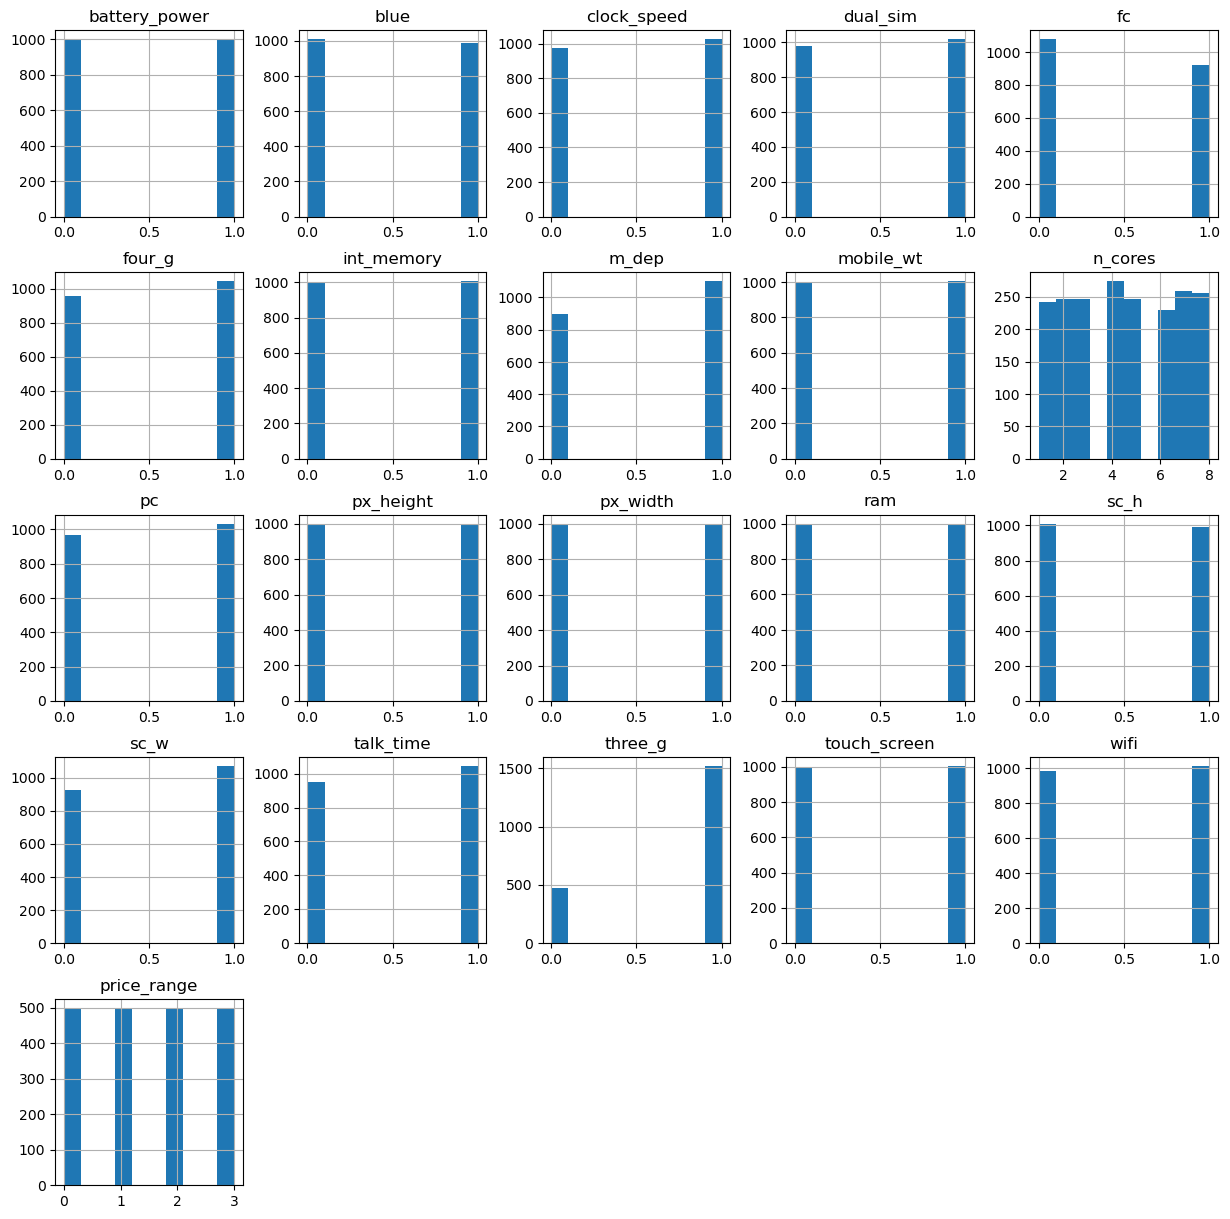

In [53]:
df.hist(figsize=(15,15))
plt.show()